In [3]:
# Load libraries
library('ggtree')
library('dplyr')
library('treeio')

In [4]:
# Load tree
tree  <- read.iqtree('Xylene_monooxygenase.trimmed.contree')

In [4]:
# Make a tibble
df  <- tbl_df(tree)

In [5]:
# Cheack nodes qualified to be a true clade
df  %>% 
filter(!is.na(UFboot) & UFboot >= 98 & SH_aLRT >= 80)

parent,node,branch.length,label,SH_aLRT,UFboot
44,45,0.6718322,98,98,98
44,50,0.7442131,100,100,100
56,57,3.5443754,100,100,100
59,60,0.2548356,100,100,100
61,62,0.1200360,100,100,100
53,71,1.0837881,98,98,98
71,72,0.5646213,100,100,100
72,73,0.4394266,100,100,100
74,75,0.9489041,100,100,100
75,76,0.1401098,100,100,100


In [10]:
# Generate and save the tree image
t  <- ggtree(tree, branch.length='none', layout='circular') + xlim(NA,34) +
geom_tiplab(aes(angle=angle), size=2.5) +
geom_point2(aes(label=label, subset=!is.na(UFboot) & UFboot >= 95 & SH_aLRT >= 80)) +
geom_hilight(node=63, fill="darkgreen", alpha=.5) +
geom_hilight(node=41, fill="firebrick", alpha=.5) +
geom_cladelabel(node=63, label='Pseudomonas, xylM', geom='label',
               offset.text=20, fill='darkgreen', alpha=.5,
                fontsize=4, hjust=0, barsize=0, color='white') +
geom_cladelabel(node=41, label='Lactococcus, xylM', geom='label', 
                offset.text=20, hjust=0, fontsize=4, fill='firebrick',
               alpha=.5, barsize=0, color='white')
ggsave('xylM_tree.pdf', scale=1.5)
ggsave('xylM_tree.jpeg', scale=1.5)

Saving 10 x 10 in image
Saving 10 x 10 in image


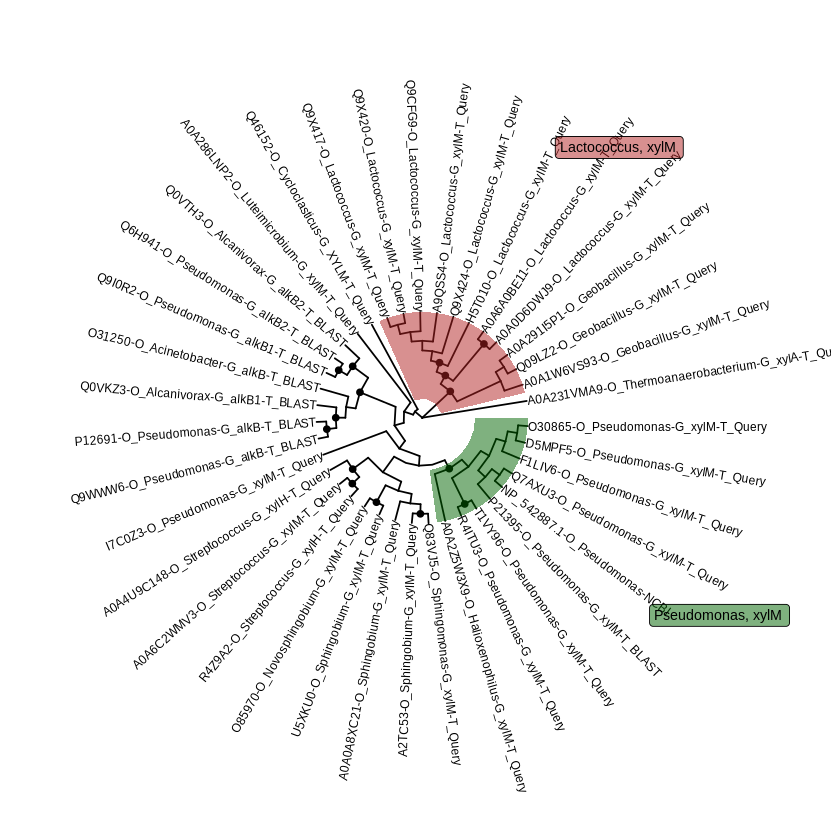

In [7]:
t

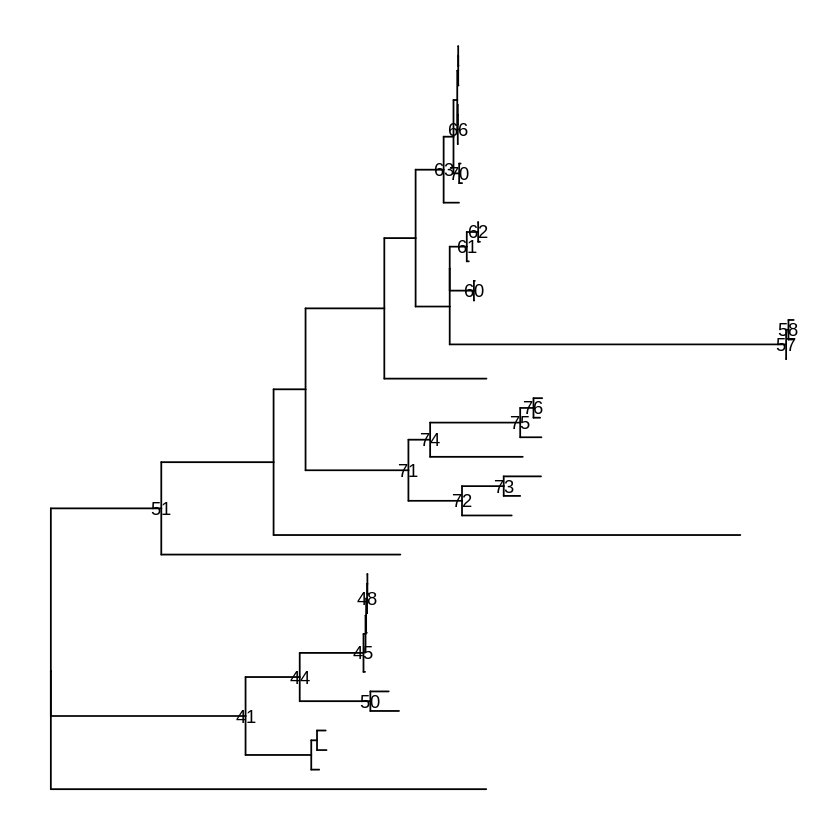

In [104]:
# Check the specific nodes which can be named a clade
ggtree(tree) +
geom_text2(aes(label=node, subset=!is.na(UFboot) & UFboot >= 85 & SH_aLRT >= 80))

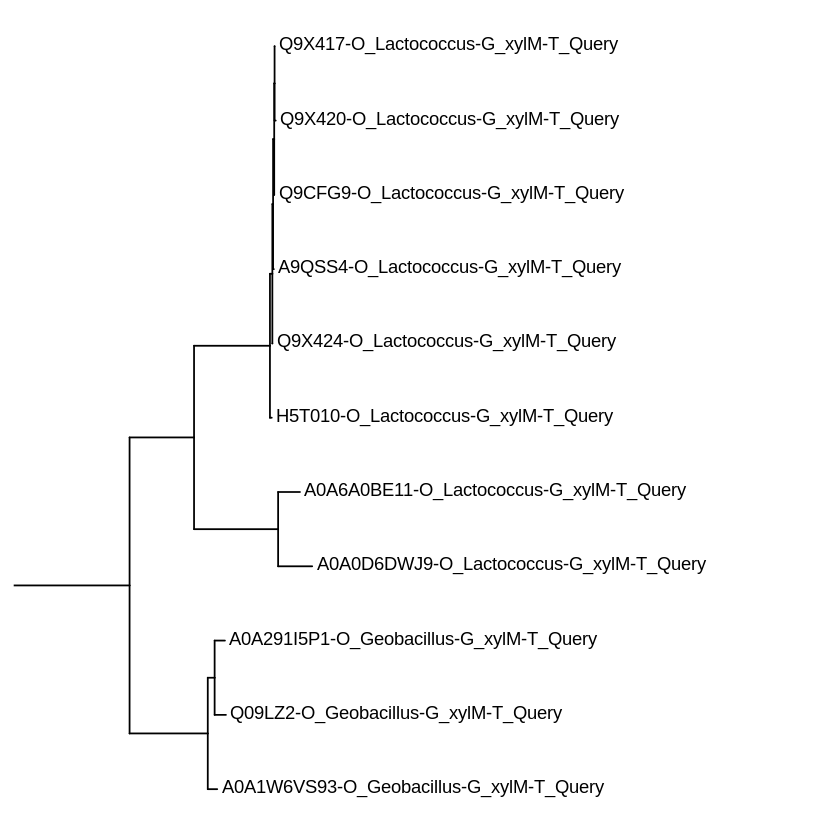

In [8]:
# View the specific node
p  <- ggtree(tree) + geom_tiplab()
viewClade(p, 41)